In [2]:
!pip install pandas seaborn matplotlib nltk wordcloud scikit-learn tqdm


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [5]:
# Filter political news
data_politicsall1 = data_cleaned[data_cleaned["subject"].isin(["politics", "politicsNews"])]
data_politicsall = data_politicsall1.drop(["subject"], axis=1)

# Filter health news
data_healthall1 = data_cleaned[data_cleaned["subject"].isin(["health"])]
data_healthall = data_healthall1.drop(["subject"], axis=1)

# Shuffle data
data_politicsall = data_politicsall.sample(frac=1).reset_index(drop=True)
data_healthall = data_healthall.sample(frac=1).reset_index(drop=True)


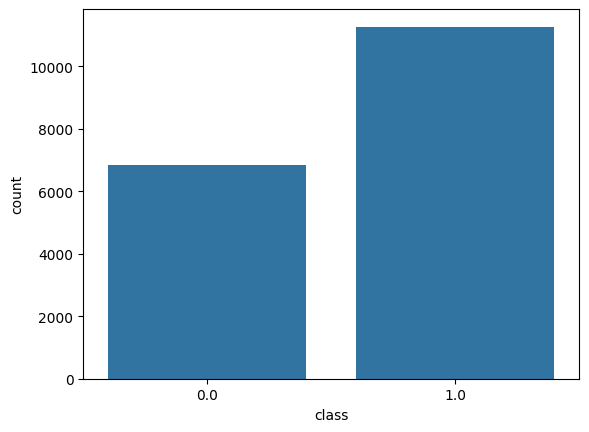

In [6]:
sns.countplot(data=data_politicsall, x='class', order=data['class'].value_counts().index)
plt.show()


In [7]:
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)  # Remove punctuation
        preprocessed_text.append(' '.join(token.lower() 
                                  for token in str(sentence).split() 
                                  if token not in stopwords.words('english')))
    return preprocessed_text

data_politicsall['text'] = preprocess_text(data_politicsall['text'].values)


[nltk_data] Downloading package punkt to /home/risav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/risav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|█████████████████████████████████████| 18110/18110 [07:55<00:00, 38.10it/s]


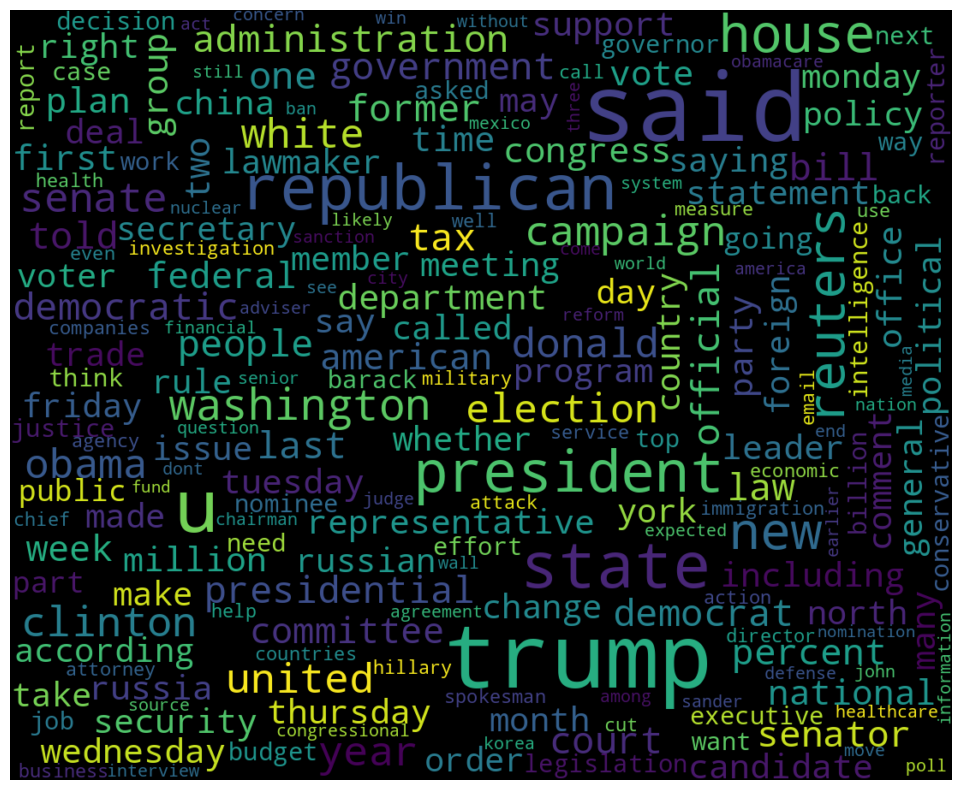

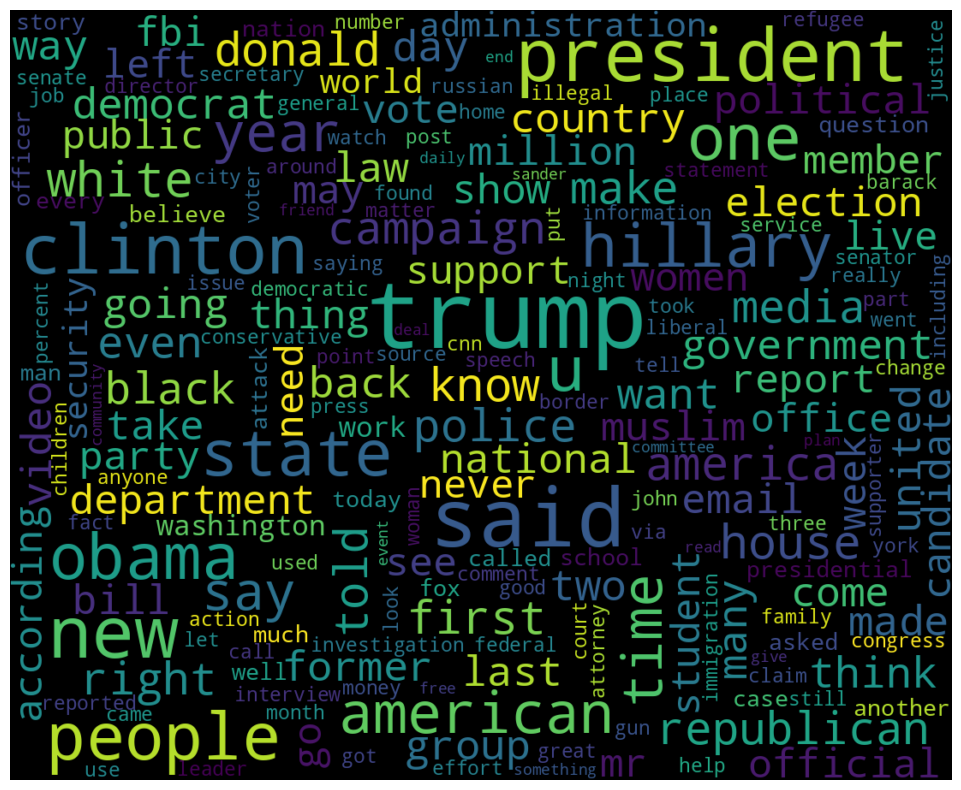

In [8]:
# WordCloud for Real News
consolidated = ' '.join(data_politicsall['text'][data_politicsall['class'] == 1].astype(str))
wordCloud = WordCloud(width=1100, height=900, max_font_size=110, collocations=False).generate(consolidated)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# WordCloud for Fake News
consolidated = ' '.join(data_politicsall['text'][data_politicsall['class'] == 0].astype(str))
wordCloud = WordCloud(width=1100, height=900, max_font_size=110, collocations=False).generate(consolidated)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [11]:
x_train, x_test, y_train, y_test = train_test_split(data_politicsall['text'], data_politicsall['class'], test_size=0.25)

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)


In [12]:
# Train Logistic Regression
modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

# Train Decision Tree Classifier
modelDCT = DecisionTreeClassifier()
modelDCT.fit(x_train, y_train)


DecisionTreeClassifier()

In [13]:
# Accuracy Scores
print("Logistic Regression Training Accuracy:", accuracy_score(y_train, modelLR.predict(x_train)))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, modelLR.predict(x_test)))

print("Decision Tree Training Accuracy:", accuracy_score(y_train, modelDCT.predict(x_train)))
print("Decision Tree Test Accuracy:", accuracy_score(y_test, modelDCT.predict(x_test)))

# Classification Reports
print("Logistic Regression Performance:")
print(classification_report(y_test, modelLR.predict(x_test)))

print("Decision Tree Classifier Performance:")
print(classification_report(y_test, modelDCT.predict(x_test)))


Logistic Regression Training Accuracy: 0.9875570608157856
Logistic Regression Test Accuracy: 0.9774734982332155
Decision Tree Training Accuracy: 0.9999263731409218
Decision Tree Test Accuracy: 0.9955830388692579
Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1716
         1.0       0.98      0.99      0.98      2812

    accuracy                           0.98      4528
   macro avg       0.98      0.97      0.98      4528
weighted avg       0.98      0.98      0.98      4528

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1716
         1.0       1.00      1.00      1.00      2812

    accuracy                           1.00      4528
   macro avg       1.00      1.00      1.00      4528
weighted avg       1.00      1.00      1.00      4528



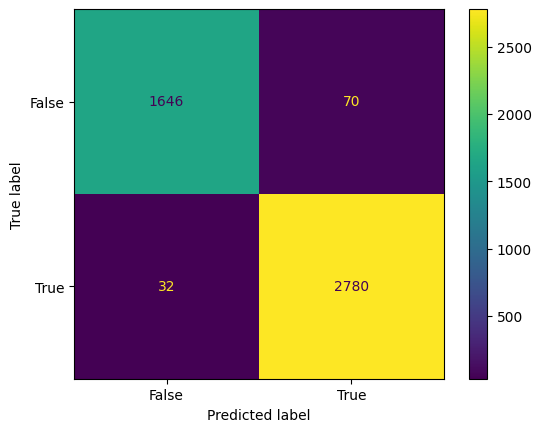

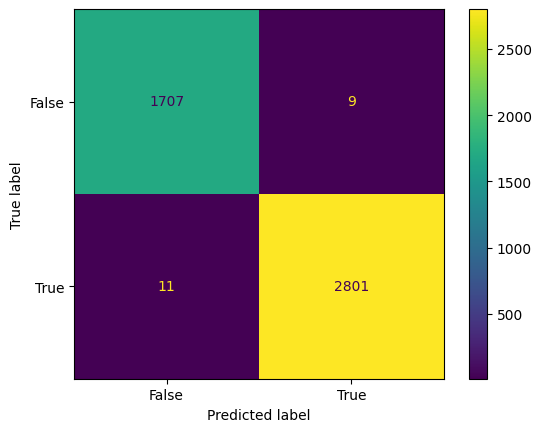

In [14]:
# Logistic Regression Confusion Matrix
cm = confusion_matrix(y_test, modelLR.predict(x_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
plt.show()

# Decision Tree Confusion Matrix
cm = confusion_matrix(y_test, modelDCT.predict(x_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
plt.show()


Logistic Regression Accuracy on Health News: 0.7494175888177053
Decision Tree Accuracy on Health News: 0.7754076878276063
Logistic Regression Performance on Health News:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86     10265
         1.0       0.70      0.01      0.03      3471

    accuracy                           0.75     13736
   macro avg       0.72      0.51      0.44     13736
weighted avg       0.74      0.75      0.65     13736

Decision Tree Performance on Health News:
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     10265
         1.0       0.97      0.11      0.20      3471

    accuracy                           0.78     13736
   macro avg       0.87      0.56      0.54     13736
weighted avg       0.82      0.78      0.70     13736



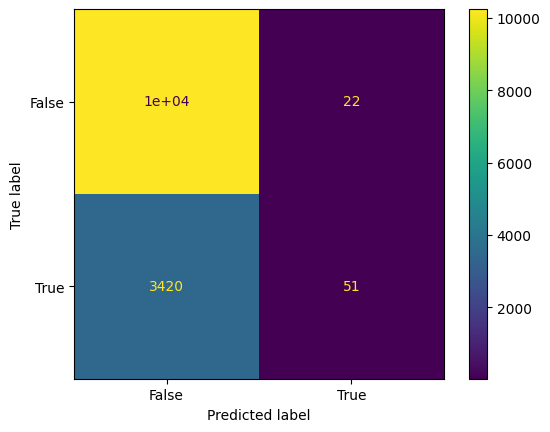

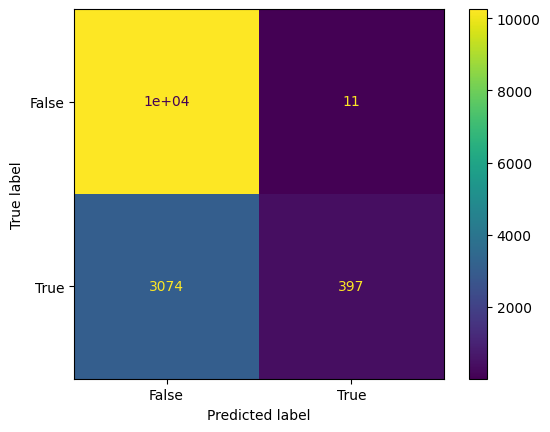

In [12]:
X_test = vectorization.transform(data_healthall['text'])
Y_test = data_healthall['class']

print("Logistic Regression Accuracy on Health News:", accuracy_score(Y_test, modelLR.predict(X_test)))
print("Decision Tree Accuracy on Health News:", accuracy_score(Y_test, modelDCT.predict(X_test)))

print("Logistic Regression Performance on Health News:")
print(classification_report(Y_test, modelLR.predict(X_test)))

print("Decision Tree Performance on Health News:")
print(classification_report(Y_test, modelDCT.predict(X_test)))

# Confusion Matrices for Health News
cm = confusion_matrix(Y_test, modelLR.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
plt.show()

cm = confusion_matrix(Y_test, modelDCT.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
plt.show()


In [19]:
input_text = ["Post about a video claims that it is a protest against confinement in the town"]

# Transform input using the same vectorizer
input_data = vectorization.transform(input_text)

# Predict using Decision Tree
prediction = modelDCT.predict(input_data)

# Output the prediction
print("Prediction:", "Real news" if prediction[0] == 1 else "Fake news")


Prediction: Fake news


In [20]:
import pickle

# Save the TF-IDF vectorizer
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorization, vec_file)

# ❌ Fix: Previously, you were saving modelLR instead of modelDCT
# ✅ Save trained Decision Tree model instead
with open("modelDCT.pkl", "wb") as model_file:
    pickle.dump(modelDCT, model_file)

print("Decision Tree Model and vectorizer saved successfully!")


Decision Tree Model and vectorizer saved successfully!


In [21]:
with open("modelDCT.pkl", "rb") as model_file:
    model = pickle.load(model_file)

print(type(model))  # Should output <class 'sklearn.tree._classes.DecisionTreeClassifier'>


<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [18]:
print(type(model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [22]:
import pickle

# Load the TF-IDF vectorizer
with open("vectorizer.pkl", "rb") as vec_file:
    vectorizer = pickle.load(vec_file)

# Load the trained Decision Tree model
with open("modelDCT.pkl", "rb") as model_file:
    modelDCT = pickle.load(model_file)

# Confirm model type
print(type(modelDCT))  # Should output <class 'sklearn.tree._classes.DecisionTreeClassifier'>


<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [23]:
feature_names = vectorizer.get_feature_names_out()
print("Total Features:", len(feature_names))  # Check total features
print("Sample Features:", feature_names[:10])  # Print first 10 words


Total Features: 95034
Sample Features: ['00' '000' '0000' '000000017' '000004' '000063sz' '00009' '00018'
 '000270ks' '0006']


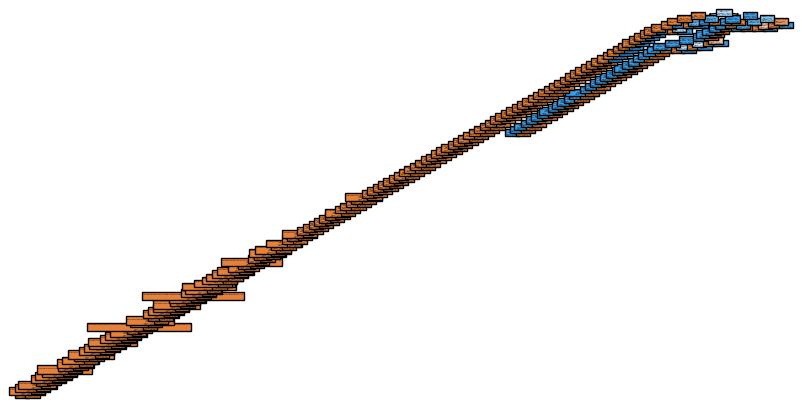

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set smaller figure size
plt.figure(figsize=(10, 5))  # Adjust size as needed

# Plot the decision tree
tree.plot_tree(
    modelDCT, 
    filled=True, 
    feature_names=feature_names,  # Words used in decision-making
    class_names=['Fake News', 'Real News']
)

# Save the tree as an image
plt.savefig("decision_tree.png", dpi=200, bbox_inches="tight")

# Show the plot
plt.show()
